## Basic NLP - Keyword Extraction in R Udpipe package
#scotus package - source data for Supreme Court Opinions
#tm package for cleaning
#dplyr and lattice for wrangling and plots


In [12]:
#install udpipe, lattice and tm

install.packages('udpipe')
install.packages('tm')
install.packages('lattice')


  There is a binary version available but the source version is later:
       binary source needs_compilation
udpipe  0.8.5  0.8.6              TRUE

  Binaries will be installed
package 'udpipe' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\admin\AppData\Local\Temp\RtmpINrtnF\downloaded_packages


also installing the dependencies 'NLP', 'slam'



package 'NLP' successfully unpacked and MD5 sums checked
package 'slam' successfully unpacked and MD5 sums checked
package 'tm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\admin\AppData\Local\Temp\RtmpINrtnF\downloaded_packages
package 'lattice' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\admin\AppData\Local\Temp\RtmpINrtnF\downloaded_packages


In [17]:
#load packages
-----------------
library(tm)
library(lattice)
library(dplyr)

ERROR: Error in -library(tm): invalid argument to unary operator


In [5]:
#devtools for installing scotus from github
install.packages("devtools")




Please download and install Rtools 3.5 from https://cran.r-project.org/bin/windows/Rtools/.

Please download and install Rtools 3.5 from https://cran.r-project.org/bin/windows/Rtools/.


v  checking for file 'C:\Users\admin\AppData\Local\Temp\RtmpINrtnF\remotes1f70767250a\EmilHvitfeldt-scotus-e5ccdea/DESCRIPTION' (727ms)
-  preparing 'scotus': (635ms)
v  checking DESCRIPTION meta-information ... 
-  checking for LF line-endings in source and make files and shell scripts
-  checking for empty or unneeded directories
-  looking to see if a 'data/datalist' file should be added
-  building 'scotus_1.0.0.tar.gz' (22.7s)
   


In [4]:
#scotus install
devtools::install_github("EmilHvitfeldt/scotus")


also installing the dependencies 'pkgload', 'rlang'




  There are binary versions available but the source versions are later:
         binary source needs_compilation
pkgload   1.2.1  1.2.2             FALSE
devtools  2.4.1  2.4.2             FALSE

package 'rlang' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\admin\AppData\Local\Temp\RtmpINrtnF\downloaded_packages


installing the source packages 'pkgload', 'devtools'



In [18]:
##wrangling, but no text cleaning 
library(scotus)
data <- scotus_sample
head(data)

year,case_name,docket_number,id,text


In [19]:
##filter on just one case
data2 <- data %>% 
  filter(case_name== 'United States v. Johnson' & year =='2000')

In [22]:
##model annotation with standard english (Udpipe)
library(udpipe)
ud_model <- udpipe_download_model(language = "english")
ud_model <-  udpipe_load_model(ud_model$file_model)
u_annot <- udpipe_annotate(ud_model, x=data2$text)
x <- as.data.frame(u_annot)

Warning message:
"package 'udpipe' was built under R version 3.6.3"Downloading udpipe model from https://raw.githubusercontent.com/jwijffels/udpipe.models.ud.2.5/master/inst/udpipe-ud-2.5-191206/english-ewt-ud-2.5-191206.udpipe to C:/Users/admin/english-ewt-ud-2.5-191206.udpipe
 - This model has been trained on version 2.5 of data from https://universaldependencies.org
 - The model is distributed under the CC-BY-SA-NC license: https://creativecommons.org/licenses/by-nc-sa/4.0
 - Visit https://github.com/jwijffels/udpipe.models.ud.2.5 for model license details.
 - For a list of all models and their licenses (most models you can download with this package have either a CC-BY-SA or a CC-BY-SA-NC license) read the documentation at ?udpipe_download_model. For building your own models: visit the documentation by typing vignette('udpipe-train', package = 'udpipe')


Warning message:
"package 'lattice' was built under R version 3.6.3"

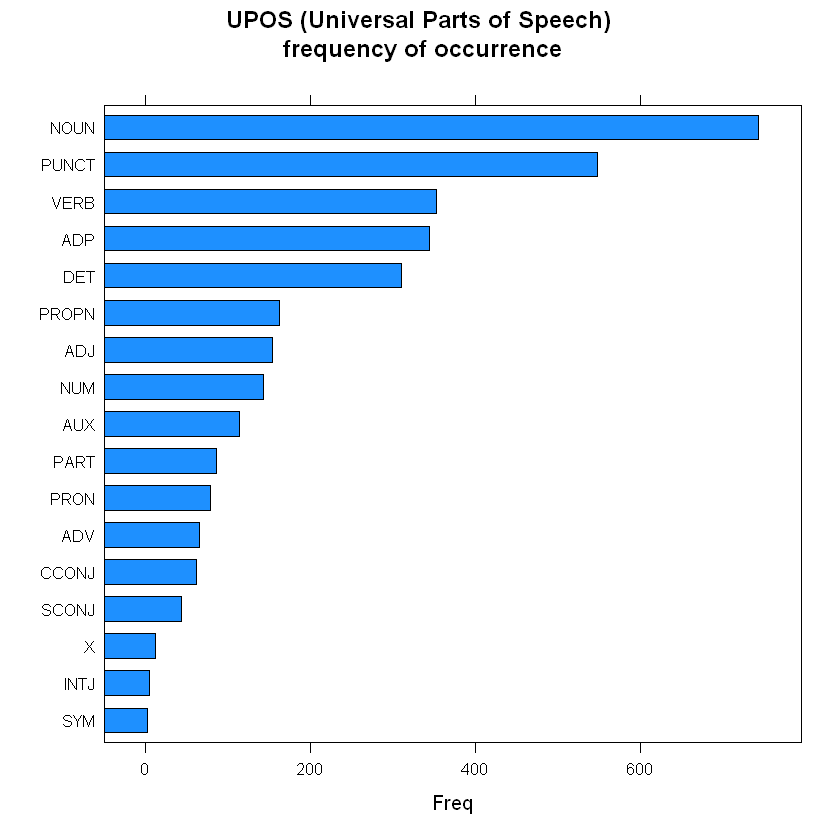

In [24]:
# universal parts of speech basic stats
library(lattice)
stats <- txt_freq(x$upos)
stats$key <- factor(stats$key, levels = rev(stats$key))
barchart(key ~ freq, data = stats, col = "dodgerblue", 
         main = "UPOS (Universal Parts of Speech)\n frequency of occurrence", 
         xlab = "Freq")

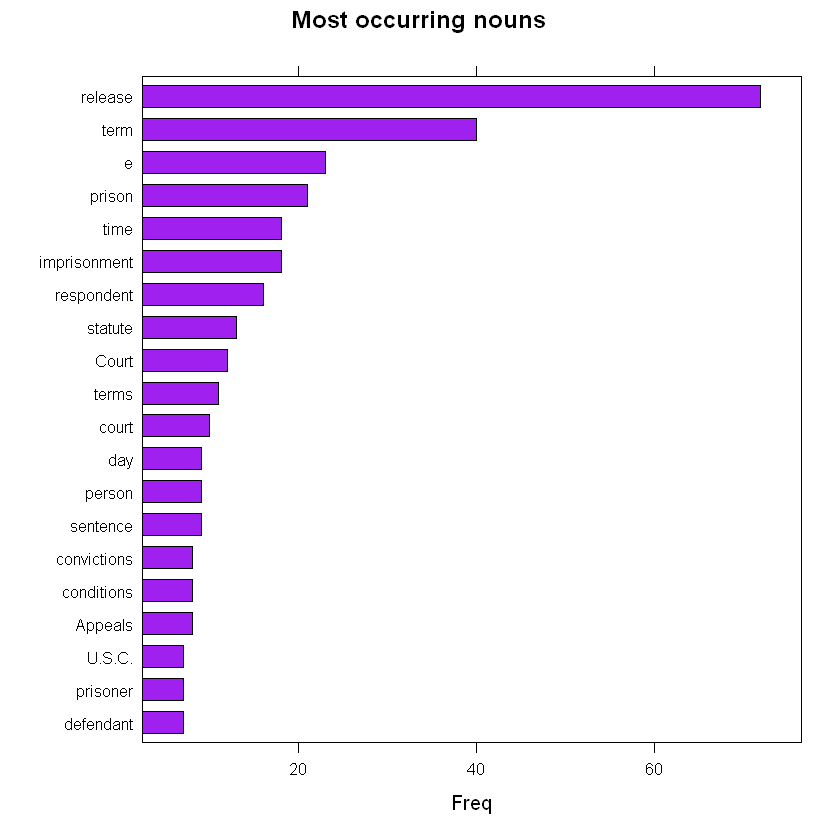

In [25]:
## top occurring nouns
stats <- subset(x, upos %in% c("NOUN")) 
stats <- txt_freq(stats$token)
stats$key <- factor(stats$key, levels = rev(stats$key))
barchart(key ~ freq, data = head(stats, 20), col = "purple", 
         main = "Most occurring nouns", xlab = "Freq")

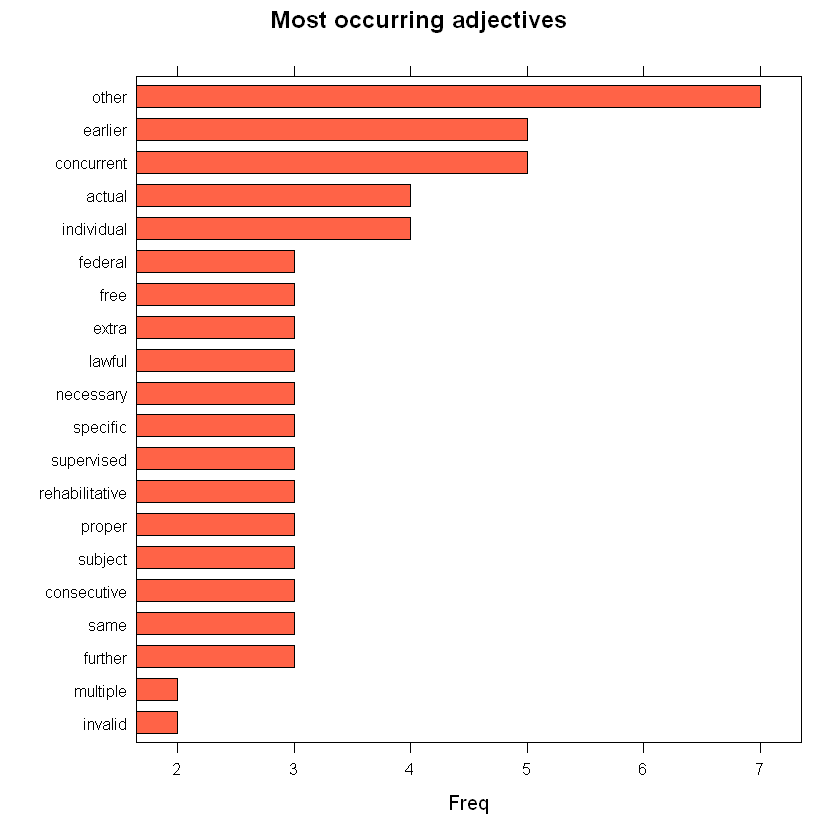

In [26]:
#top occurring adjectives

stats <- subset(x, upos %in% c("ADJ")) 
stats <- txt_freq(stats$token)
stats$key <- factor(stats$key, levels = rev(stats$key))
barchart(key ~ freq, data = head(stats, 20), col = "tomato", 
         main = "Most occurring adjectives", xlab = "Freq")

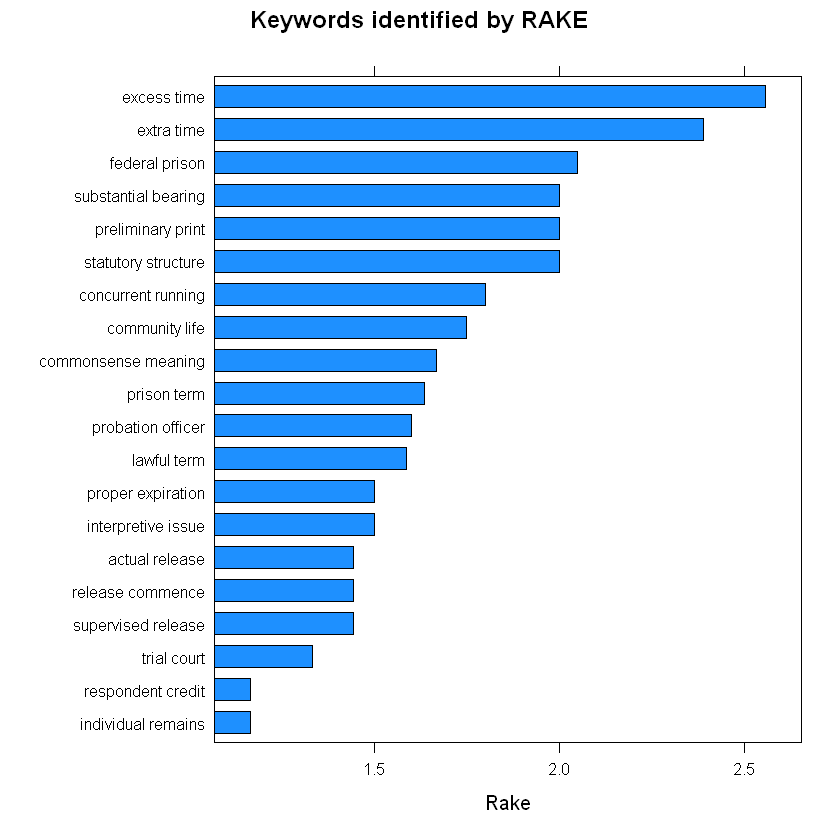

In [27]:
##keywords using RAKE (rapid automatic keyword extraction) algo.

stats <- keywords_rake(x = x, term = "lemma", group = "doc_id", 
                       relevant = x$upos %in% c("NOUN", "ADJ"))
stats$key <- factor(stats$keyword, levels = rev(stats$keyword))
barchart(key ~ rake, data = head(subset(stats, freq > 1), 20), col = "dodgerblue", 
         main = "Keywords identified by RAKE", 
         xlab = "Rake")


In [28]:
##cooccurences to see how words are used together
cooc <- cooccurrence(x = subset(x, upos %in% c("NOUN", "ADJ")), 
                     term = "lemma", 
                     group = c("doc_id", "paragraph_id", "sentence_id"))
head(cooc)



term1,term2,cooc
release,term,53
imprisonment,term,25
prison,term,24
e,release,22
imprisonment,release,20
court,release,17
